In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_AN_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6,148.0,72,35.0,0.0,33.6,0.627,50.0
1,1,85.0,66,29.0,0.0,26.6,0.351,31.0
2,8,183.0,64,0.0,0.0,23.3,0.672,32.0
3,1,89.0,66,23.0,94.0,28.1,0.167,21.0
4,0,137.0,40,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10,101.0,76,48.0,180.0,32.9,0.171,63.0
764,2,122.0,70,27.0,0.0,36.8,0.340,27.0
765,5,121.0,72,23.0,112.0,26.2,0.245,30.0
766,1,126.0,60,0.0,0.0,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	3
int64		column 3	0
float64		column 4	3
float64		column 5	9
float64		column 6	12
float64		column 7	3
float64		column 8	18


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,768.000000,765.000000,768.000000,765.000000,759.000000,756.000000,765.000000,750.000000
mean,3.845052,120.745098,69.105469,20.535948,79.255599,31.897222,0.472311,33.286667
std,3.369578,31.909954,19.355807,15.938784,115.226383,7.782048,0.331624,11.759572
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.275000,0.244000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,23.000000,32.000000,0.374000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,126.500000,36.500000,0.626000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,59.400000,2.420000,81.000000


<AxesSubplot:>

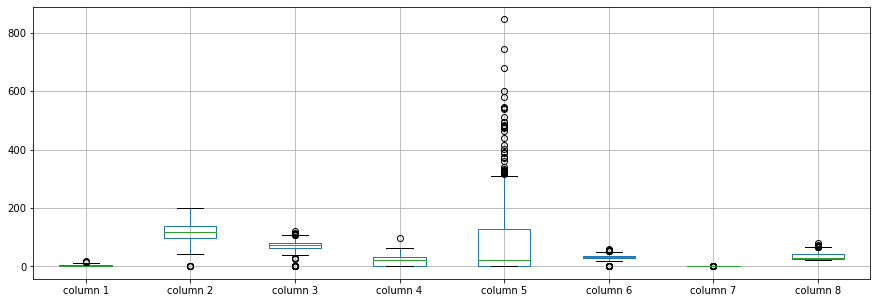

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.845052
column 2    120.745098
column 3     69.105469
column 4     20.535948
column 5     79.255599
column 6     31.897222
column 7      0.472311
column 8     33.286667
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.131400,0.141282,-0.086005,-0.076729,0.014955,-0.033759,0.542140
column 2,0.131400,1.000000,0.156327,0.057934,0.324490,0.220235,0.137086,0.275733
column 3,0.141282,0.156327,1.000000,0.205352,0.087011,0.274098,0.042380,0.242811
column 4,-0.086005,0.057934,0.205352,1.000000,0.439464,0.392553,0.184309,-0.116598
column 5,-0.076729,0.324490,0.087011,0.439464,1.000000,0.201047,0.187729,-0.042324
column 6,0.014955,0.220235,0.274098,0.392553,0.201047,1.000000,0.145241,0.040976
column 7,-0.033759,0.137086,0.042380,0.184309,0.187729,0.145241,1.000000,0.029432
column 8,0.542140,0.275733,0.242811,-0.116598,-0.042324,0.040976,0.029432,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+33,8+33+33,8+33+33+33,8+33+33+33+33,8+33+33+33+33+33,8+33+33+33+33,8+33+33+33,8+33+33,8+33,8], vae_layer = False, seed = 33)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 424.80546887715656
Epoch: 1 , loss: 425.7886562347412
Epoch: 2 , loss: 420.0673662821452
Epoch: 3 , loss: 424.3857828776042
Epoch: 4 , loss: 421.8739070892334
Epoch: 5 , loss: 414.7203992207845
Epoch: 6 , loss: 377.55888239542645
Epoch: 7 , loss: 360.9251346588135
Epoch: 8 , loss: 349.65145683288574
Epoch: 9 , loss: 342.9333569208781
Epoch: 10 , loss: 335.18211523691815
Epoch: 11 , loss: 330.04547278086346
Epoch: 12 , loss: 328.38568782806396
Epoch: 13 , loss: 324.46905453999835
Epoch: 14 , loss: 313.307918548584
Epoch: 15 , loss: 313.4183130264282
Epoch: 16 , loss: 311.8343817392985
Epoch: 17 , loss: 308.3619686762492
Epoch: 18 , loss: 308.37421735127765
Epoch: 19 , loss: 312.86584281921387
Epoch: 20 , loss: 304.74693330128986
Epoch: 21 , loss: 299.9596424102783
Epoch: 22 , loss: 308.8524417877197
Epoch: 23 , loss: 305.3728551864624
Epoch: 24 , loss: 293.6116205851237
Epoch: 25 , loss: 290.512443224589

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000
column 2    99.000
column 3    84.000
column 4     0.000
column 5     0.000
column 6    35.400
column 7     0.388
column 8    50.000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
763,0,0.0,0,0.0,0.0,0.0,0.0,0.0
764,0,0.0,0,0.0,0.0,0.0,0.0,0.0
765,0,0.0,0,0.0,0.0,0.0,0.0,0.0
766,0,0.0,0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(474.9731636814732, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.08222399276333923

In [18]:
new_df.iloc[66,:]

column 1      0.000
column 2    109.000
column 3     88.000
column 4     30.000
column 5      0.000
column 6     32.500
column 7      0.855
column 8     38.000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6,148.0,72,35.0,0.0,33.6,0.627,50.0
1,1,85.0,66,29.0,0.0,26.6,0.351,31.0
2,8,183.0,64,0.0,0.0,23.3,0.672,32.0
3,1,89.0,66,23.0,94.0,28.1,0.167,21.0
4,0,137.0,40,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10,101.0,76,48.0,180.0,32.9,0.171,63.0
764,2,122.0,70,27.0,0.0,36.8,0.340,27.0
765,5,121.0,72,23.0,112.0,26.2,0.245,30.0
766,1,126.0,60,0.0,0.0,30.1,0.349,47.0


In [20]:
imputations[-1].to_excel("PID_AN_1.xlsx", index=False, header=False)